# 1)煤岩裂隙提取

(459, 549)
1.0
0.0


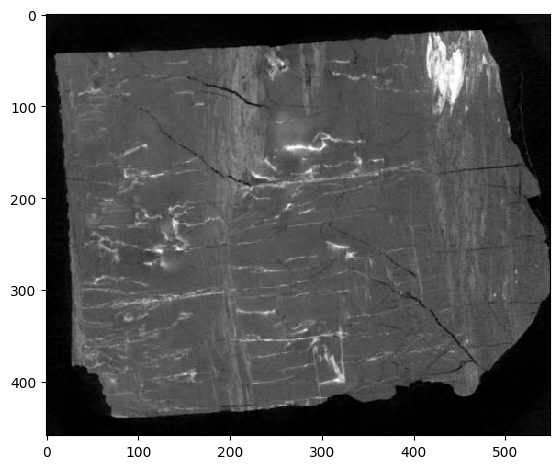

In [19]:
from skimage import io,filters
import skimage.morphology as sm
import matplotlib.pyplot as plt


#img1=io.imread('./images/CoalCT1.jpg',as_gray=True)
#img2=io.imread('./images/CoalCT2.jpg',as_gray=True)
#img3=io.imread('./images/CoalCT3.jpg',as_gray=True)
img4=io.imread('./images/CoalCT4.jpg',as_gray=True)

io.imshow(img4)
print(img4.shape)
print(img4.max())
print(img4.min())

## 腐蚀：扩大黑色部分，减小白色部分。可用来提取骨干信息，去掉毛刺，去掉孤立的像素

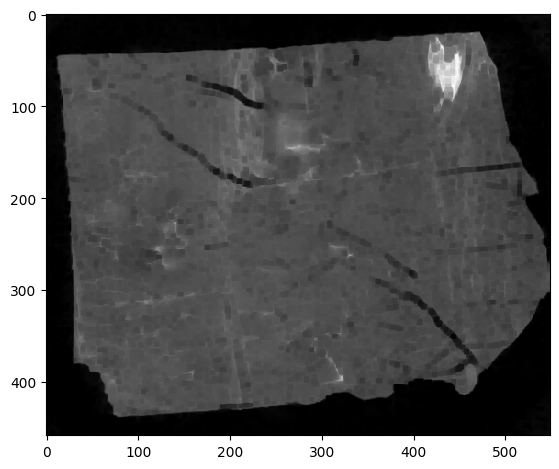

In [21]:
# erosion
# 腐蚀的作用：扩大黑色部分，减小白色部分。可用来提取骨干信息，去掉毛刺，去掉孤立的像素

ero4=sm.erosion(img4,sm.square(5))
io.imshow(ero4)

C:\Users\xyt556\AppData\Local\Temp\4\ipykernel_43668\907886467.py:6: UserWarning: Possible precision loss converting image of type float64 to uint8 as required by rank filters. Convert manually using skimage.util.img_as_ubyte to silence this warning.
  ehc_ero4=sfr.enhance_contrast(ero4,disk(5))


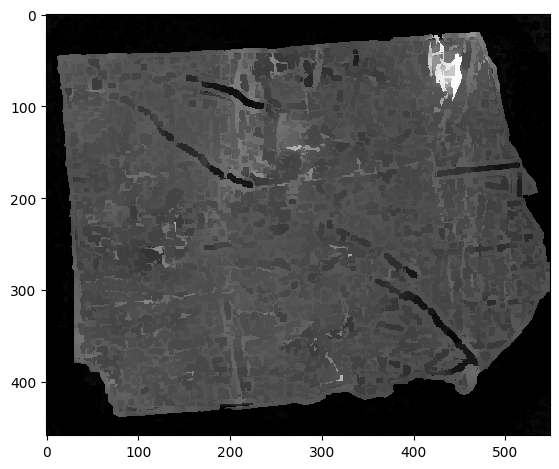

In [24]:
# enhance_contrast

from skimage.morphology import disk
import skimage.filters.rank as sfr

ehc_ero4=sfr.enhance_contrast(ero4,disk(5))
io.imshow(ehc_ero4)

## 分析：腐蚀、对比度增强之后发现裂缝已经比较明显，以下进行提取裂缝尝试

40


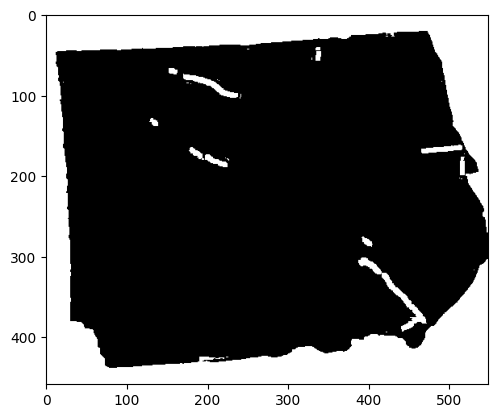

In [25]:
# otsu 
#       裂缝二值化，能够较好的去除图像右上角的干扰，
#       正确获得裂缝信息，但是裂缝信息有明显损失

from skimage import filters,exposure
import skimage.filters.rank as sfr
from skimage.morphology import disk

thresh=filters.threshold_otsu(ehc_ero4)
print(thresh)
otsu=(ehc_ero4<=thresh)
plt.imshow(otsu,plt.cm.gray)

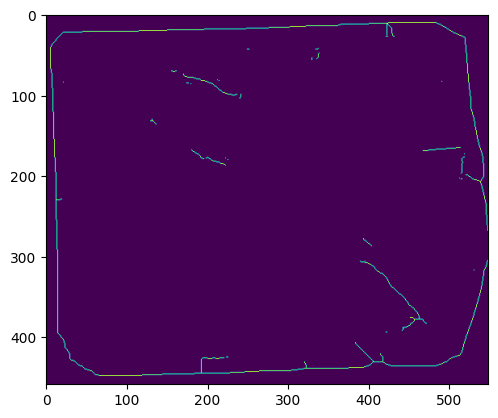

In [26]:
# 提取骨架，获得裂缝信息
from skimage import morphology

frac=morphology.skeletonize(otsu)
plt.imshow(frac)

### 其他滤波算子效果对比

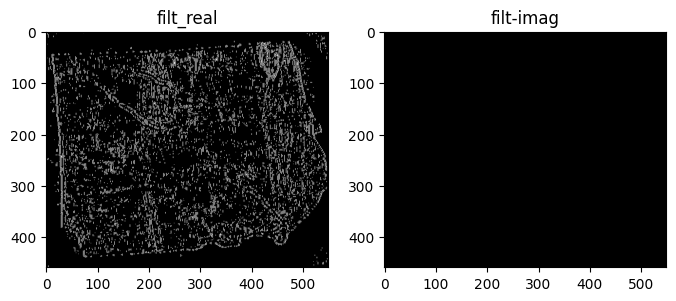

In [27]:
# gabor

from skimage import filters

filt_real,filt_img=filters.gabor(ehc_ero4,frequency=0.5)#调整frequency值对比结果
plt.figure('gabor',figsize=(8,8))
plt.subplot(121)
plt.title('filt_real')
plt.imshow(filt_real,plt.cm.gray)
plt.subplot(122)
plt.title('filt-imag')
plt.imshow(filt_img,plt.cm.gray)
plt.show()

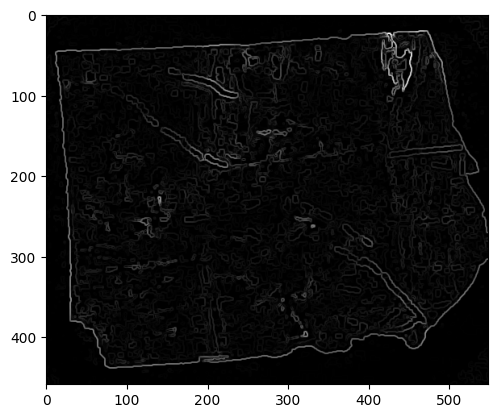

In [28]:
#sobel

from skimage import filters

edges=filters.sobel(ehc_ero4)
plt.imshow(edges,plt.cm.gray)

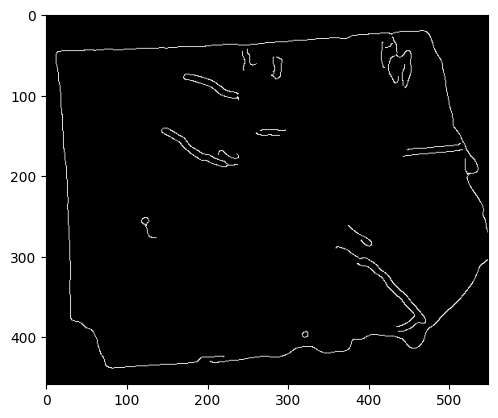

In [29]:
# canny

from skimage import feature
edges=feature.canny(ehc_ero4,sigma=3)
plt.imshow(edges,plt.cm.gray)

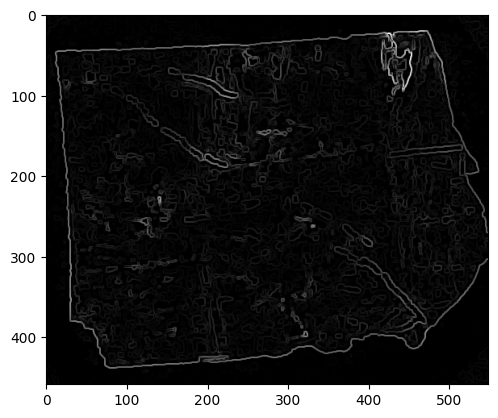

In [30]:
# prewitt
from skimage import filters

edges=filters.prewitt(ehc_ero4)
plt.imshow(edges,plt.cm.gray)

# 2) 砂岩孔隙识别与提取

(586, 621)
0.01508313725490196
1.0


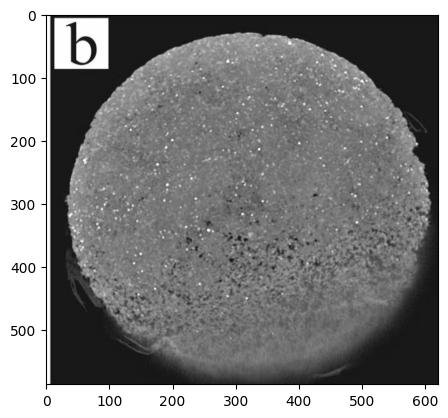

In [32]:
from skimage import io,filters
import skimage.morphology as sm
import matplotlib.pyplot as plt


sand=io.imread('./images/SandCT.jpg',as_gray=True)

plt.imshow(sand,plt.cm.gray)
print(sand.shape)
print(sand.min())
print(sand.max())

4 255


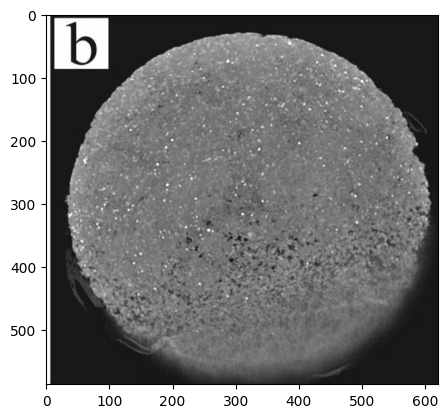

In [33]:
# float to uint8
from skimage import img_as_ubyte
import numpy as np

img=img_as_ubyte(sand)
plt.imshow(img,plt.cm.gray)
print(img.min(),img.max())

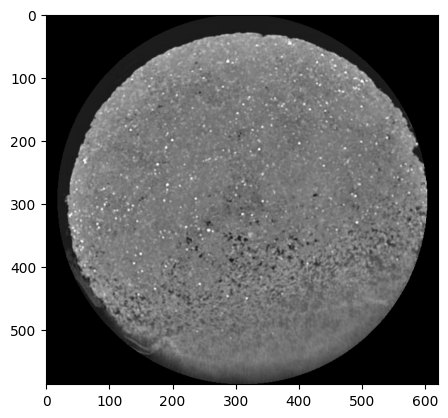

In [34]:
# 裁剪去掉图片编号b
import numpy as np

nrows, ncols = img.shape
row, col = np.ogrid[:nrows, :ncols]
cnt_row, cnt_col = nrows / 2, ncols / 2
outer_disk_mask = ((row - cnt_row)**2 + (col - cnt_col)**2 > (nrows / 2)**2)
img[outer_disk_mask] = 0
plt.imshow(img,plt.cm.gray)

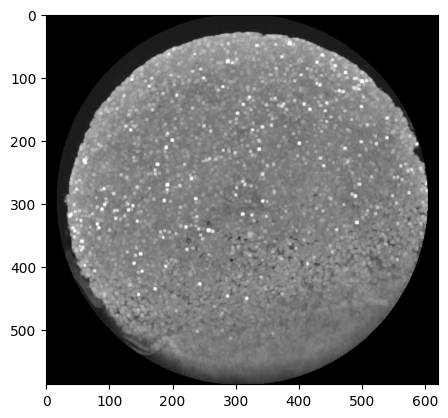

In [35]:
# 膨胀：膨胀操作可以扩大白色值范围，压缩黑色值范围。一般用来扩充边缘或填充小的孔洞。

from skimage import morphology as sm

d_img=sm.dilation(img,sm.square(3))

plt.imshow(d_img,plt.cm.gray)

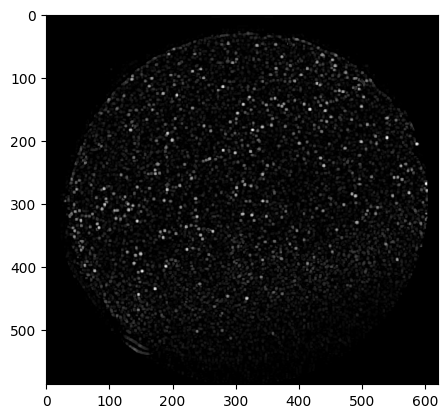

In [36]:
# white_tophat：
# 白帽运算，将原图像减去它的开运算值(先腐蚀再膨胀)，返回比结构化元素小的白点

from skimage import exposure

dst=sm.white_tophat(d_img,sm.square(5))

plt.imshow(dst,plt.cm.gray)

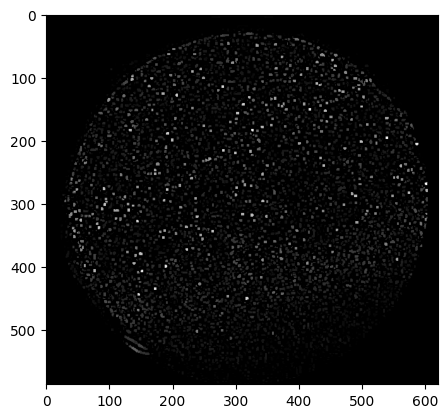

In [37]:
# enhance_contrast

from skimage.morphology import disk
import skimage.filters.rank as sfr

ehc_dst=sfr.enhance_contrast(dst,disk(4))
plt.imshow(ehc_dst,plt.cm.gray)

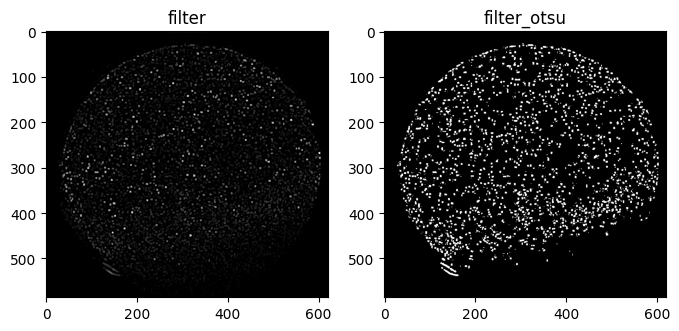

In [38]:


from skimage import filters

#flt_img=filters.median(ehc_dst,disk(5))
dst=filters.gaussian(ehc_dst,sigma=0.4)

#
thresh=filters.threshold_otsu(dst)
ostu_dst=(dst>=thresh)

plt.figure("filter",figsize=(8,8))

plt.subplot(121)
plt.title('filter')
plt.imshow(dst,plt.cm.gray)
plt.subplot(122)
plt.title('filter_otsu')
plt.imshow(ostu_dst,plt.cm.gray)

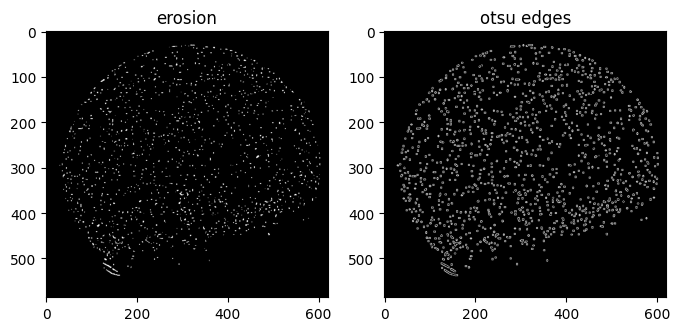

In [39]:
# canny算子
from skimage import feature

img=sm.erosion(ostu_dst)

edges=feature.canny(img,sigma=1.5)

plt.figure("edges",figsize=(8,8))

plt.subplot(121)
plt.title('erosion')
plt.imshow(img,plt.cm.gray)

plt.subplot(122)
plt.title('otsu edges')
plt.imshow(edges,plt.cm.gray)
plt.show()